# Importing needed libraries

In [18]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings
import optuna

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import *
#from tf.keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import time

# Utility functions

In [20]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

# Main section

In [21]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape)
print("Training response shape:, ", y_train.shape)
print("Testing response shape: ", y_test.shape)

image_size = (x_train.shape[1], x_train.shape[2])

# Flatten the images
image_vector_size = image_size[0] * image_size[1] # 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.
print(x_train.shape)

print("First 5 training labels: ", y_train[:5]) 

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])
print(y_train.shape)

opt_dict = {'nadam':tf.keras.optimizers.Nadam,
            'adam':tf.keras.optimizers.Adam,
            'sgd':tf.keras.optimizers.SGD,
            'rmsprop':tf.keras.optimizers.RMSprop,
            'adadelta':tf.keras.optimizers.Adadelta,
            'adagrad':tf.keras.optimizers.Adagrad}

verbose_bool = False # True, False
loss = 'categorical_crossentropy' # categorical_crossentropy

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training response shape:,  (60000,)
Testing response shape:  (10000,)
(60000, 784)
First 5 training labels:  [9 0 0 3 0]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


# Models 

## Trial 0

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Final test loss: 0.474
Final test accuracy: 0.858
Computation time: 79 mins


<Figure size 800x600 with 0 Axes>

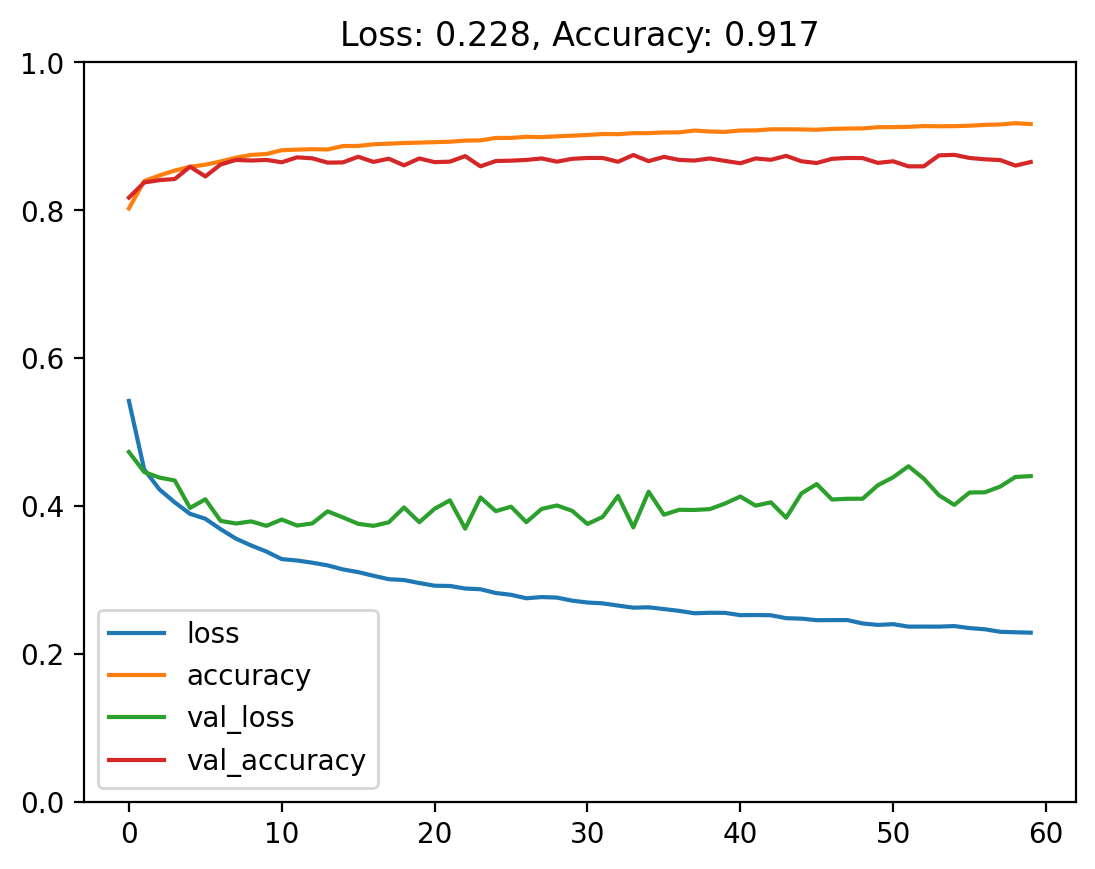

In [22]:
# Trial 0 model

# Parameters
units = 32
activation_funct = 'sigmoid' 
learning_rate = 0.1
num_epochs = 60
momentum = 0.8
optimizer_name  = opt_dict['sgd'](lr=learning_rate, momentum=momentum) 
batch_size = 1

# Build model function
def build_model_trial():
  model = Sequential()
  model.add(Dense(units=units, activation=activation_funct, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model = build_model_trial()
model.summary()
model.compile(optimizer=optimizer_name, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=verbose_bool, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history)
print(f'Final test loss: {loss:.3}')
print(f'Final test accuracy: {accuracy:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 1

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                25120     
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.484
Test accuracy: 0.829
Computation time: 1 mins


<Figure size 800x600 with 0 Axes>

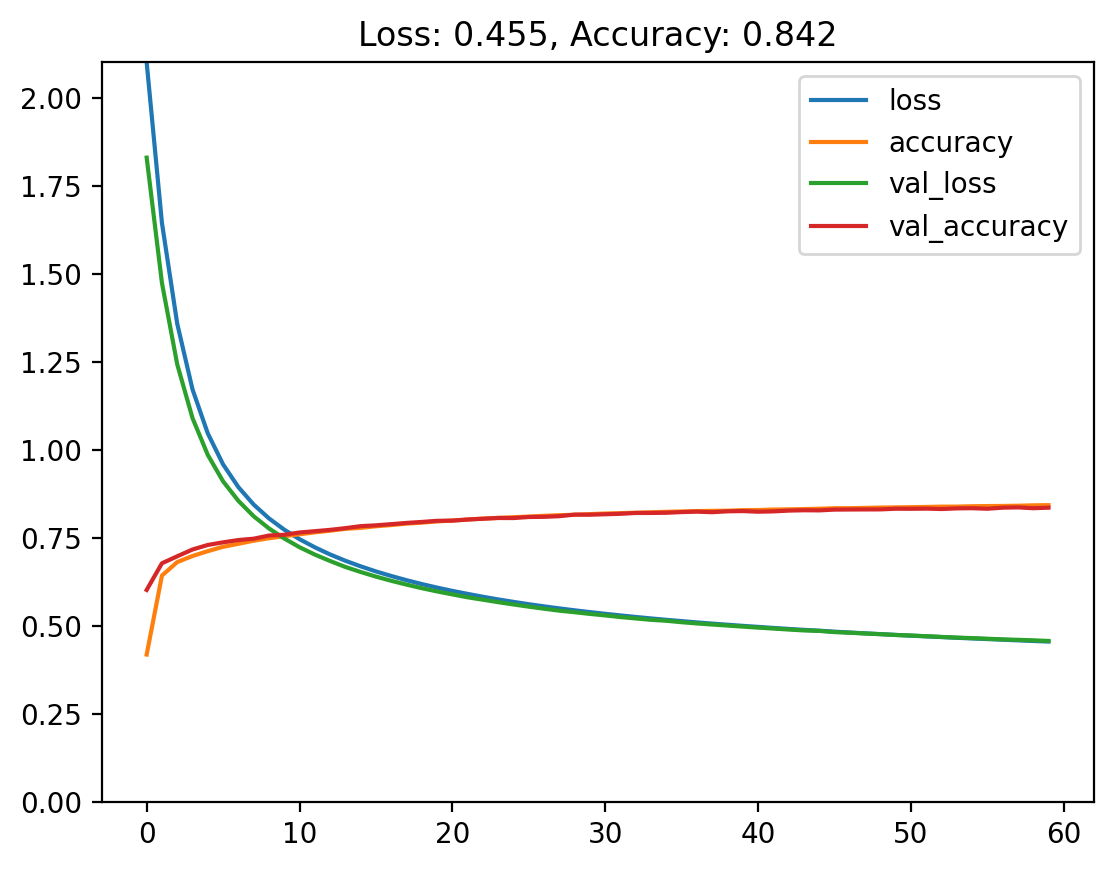

In [17]:
# Trial 1 

# Parameters
units_1 = 32
activation_funct_1 = 'sigmoid'
learning_rate_1 = 0.1 
num_epochs_1 = 60 
momentum_1 = 0.8
optimizer_name_1  = opt_dict['sgd'](lr=learning_rate_1, momentum=momentum_1) 
batch_size_1 = 600

# Build model function
def build_model_trial1():
  model = Sequential()
  model.add(Dense(units=units_1, activation=activation_funct_1, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_1 = build_model_trial1()
model_1.summary()
model_1.compile(optimizer=optimizer_name_1, loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, batch_size=batch_size_1, epochs=num_epochs_1, verbose=verbose_bool, validation_split=.1)
loss_1, accuracy_1  = model_1.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_1)
print(f'Test loss: {loss_1:.3}')
print(f'Test accuracy: {accuracy_1:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.446
Test accuracy: 0.864
Computation time: 78 mins


<Figure size 800x600 with 0 Axes>

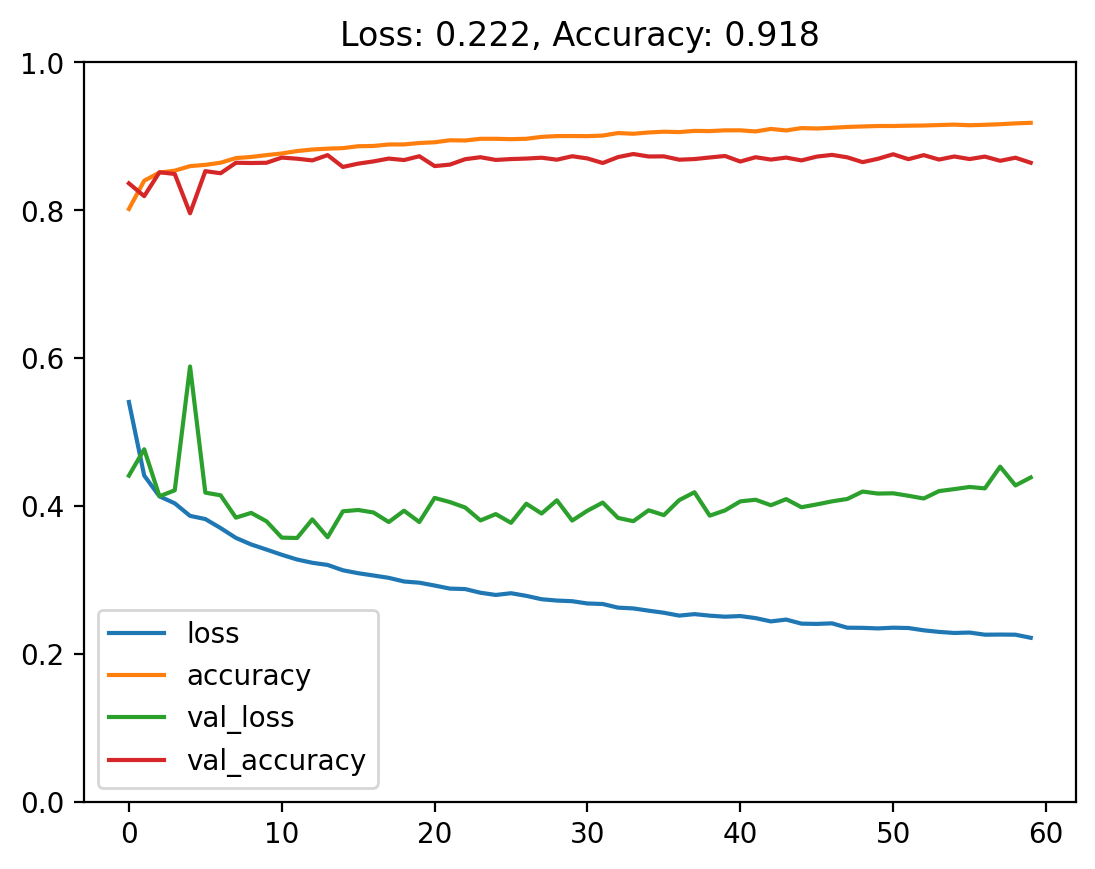

In [ ]:
# Trial 2

# Parameters
units_2 = 32 
activation_funct_2 = 'sigmoid' 
learning_rate_2 = 0.01 
num_epochs_2 = 60 
momentum_2 = 0.8
optimizer_name_2  = opt_dict['sgd'](lr=learning_rate_2, momentum=momentum_2) 
batch_size_2 = 1 

# Build model function
def build_model_trial2():
  model = Sequential()
  model.add(Dense(units=units_2, activation=activation_funct_2, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_2 = build_model_trial2()
model_2.summary()
model_2.compile(optimizer=optimizer_name_2, loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, batch_size=batch_size_2, epochs=num_epochs_2, verbose=verbose_bool, validation_split=.1)
loss_2, accuracy_2  = model_2.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_2)
print(f'Test loss: {loss_2:.3}')
print(f'Test accuracy: {accuracy_2:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.423
Test accuracy: 0.864
Computation time: 38 mins


<Figure size 800x600 with 0 Axes>

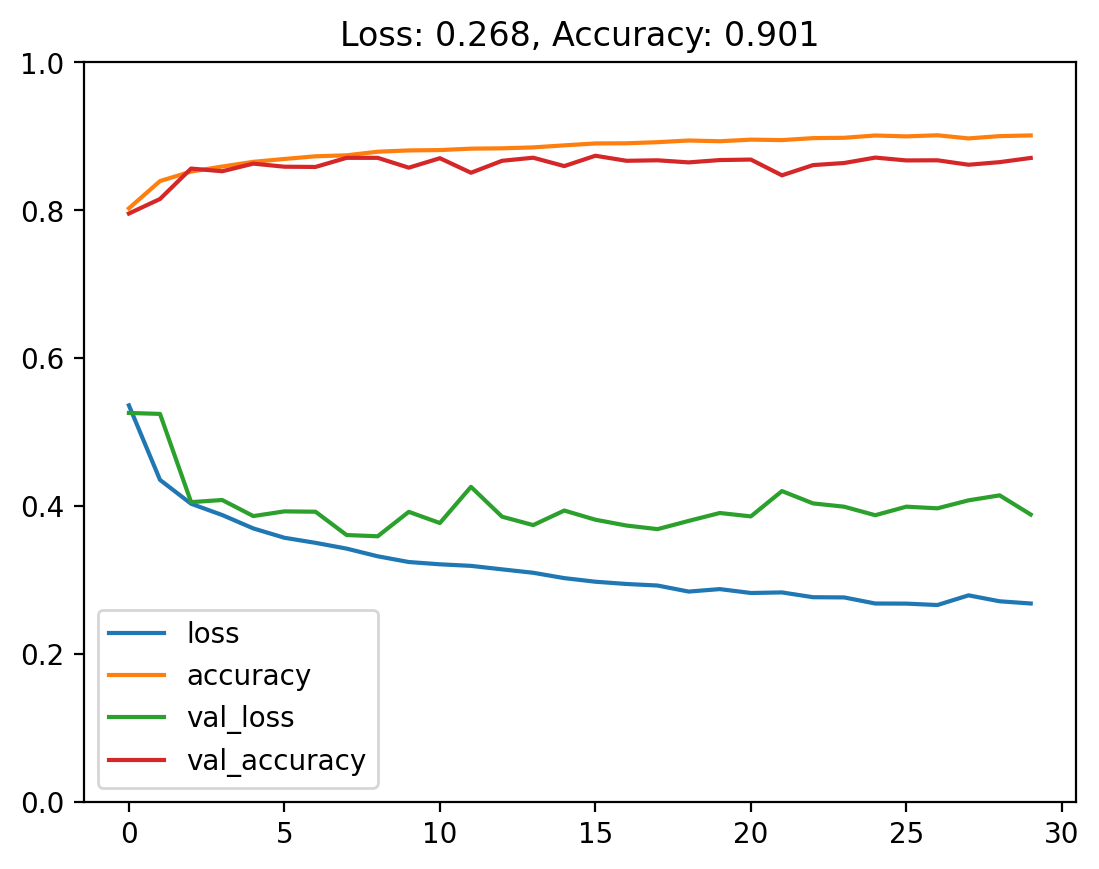

In [ ]:
# Trial 3

# Parameters
units_3 = 32
activation_funct_3 = 'sigmoid' 
learning_rate_3 = 0.01 
num_epochs_3 = 30 
momentum_3 = 0.8
optimizer_name_3  = opt_dict['sgd'](lr=learning_rate_3, momentum=momentum_3) 
batch_size_3 = 1 

# Build model function
def build_model_trial3():
  model = Sequential()
  model.add(Dense(units=units_3, activation=activation_funct_3, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_3 = build_model_trial3()
model_3.summary()
model_3.compile(optimizer=optimizer_name_3, loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, batch_size=batch_size_3, epochs=num_epochs_3, verbose=verbose_bool, validation_split=.1)
loss_3, accuracy_3  = model_3.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_3)
print(f'Test loss: {loss_3:.3}')
print(f'Test accuracy: {accuracy_3:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.541
Test accuracy: 0.825
Computation time: 40 mins


<Figure size 800x600 with 0 Axes>

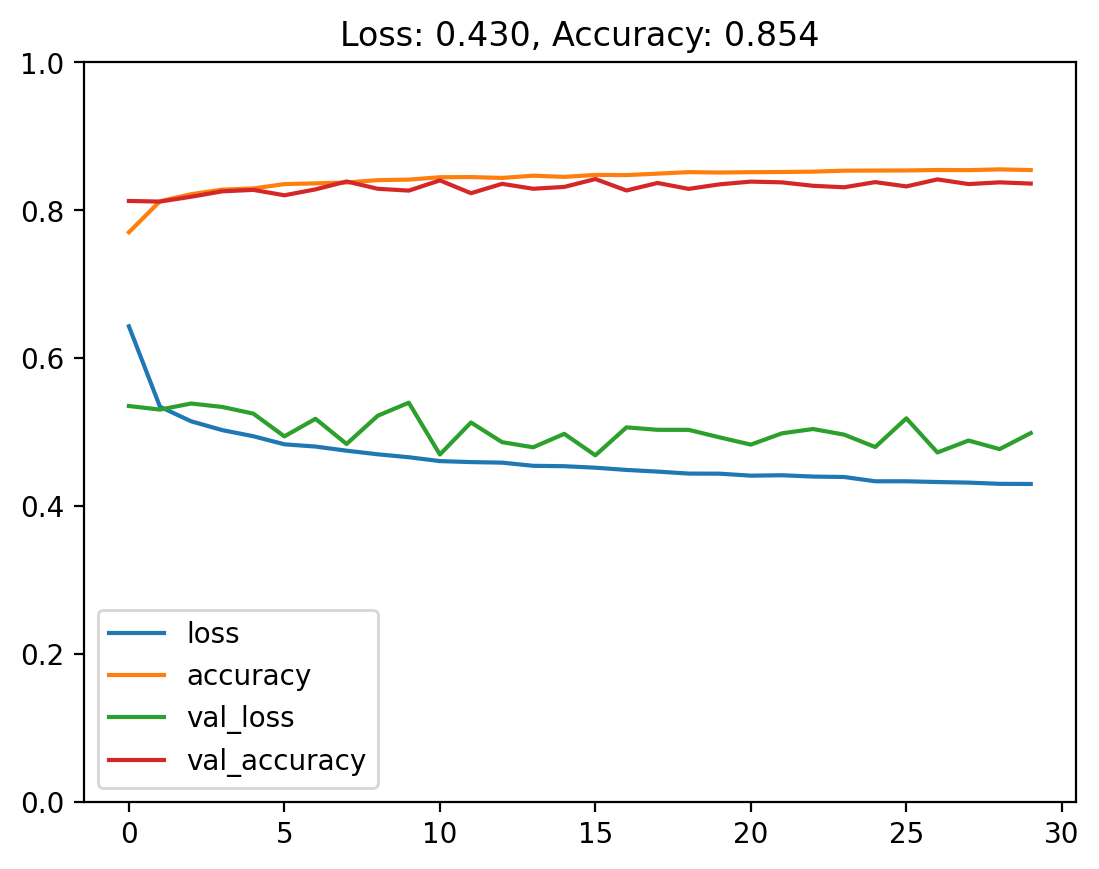

In [ ]:
# Trial 4

# Parameters
units_4 = 8 
activation_funct_4 = 'sigmoid' 
learning_rate_4 = 0.01
num_epochs_4 = 30
momentum_4 = 0.8
optimizer_name_4  = opt_dict['sgd'](lr=learning_rate_4, momentum=momentum_4) # any of the following: nadam, adam, sgd, rmsprop, adadelta, adagrad
batch_size_4 = 1 # integer

# Build model function
def build_model_trial4():
  model = Sequential()
  model.add(Dense(units=units_4, activation=activation_funct_4, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_4 = build_model_trial4()
model_4.summary()
model_4.compile(optimizer=optimizer_name_4, loss='categorical_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, batch_size=batch_size_4, epochs=num_epochs_4, verbose=verbose_bool, validation_split=.1)
loss_4, accuracy_4  = model_4.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_4)
print(f'Test loss: {loss_4:.3}')
print(f'Test accuracy: {accuracy_4:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 5

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.368
Test accuracy: 0.873
Computation time: 36 mins


<Figure size 800x600 with 0 Axes>

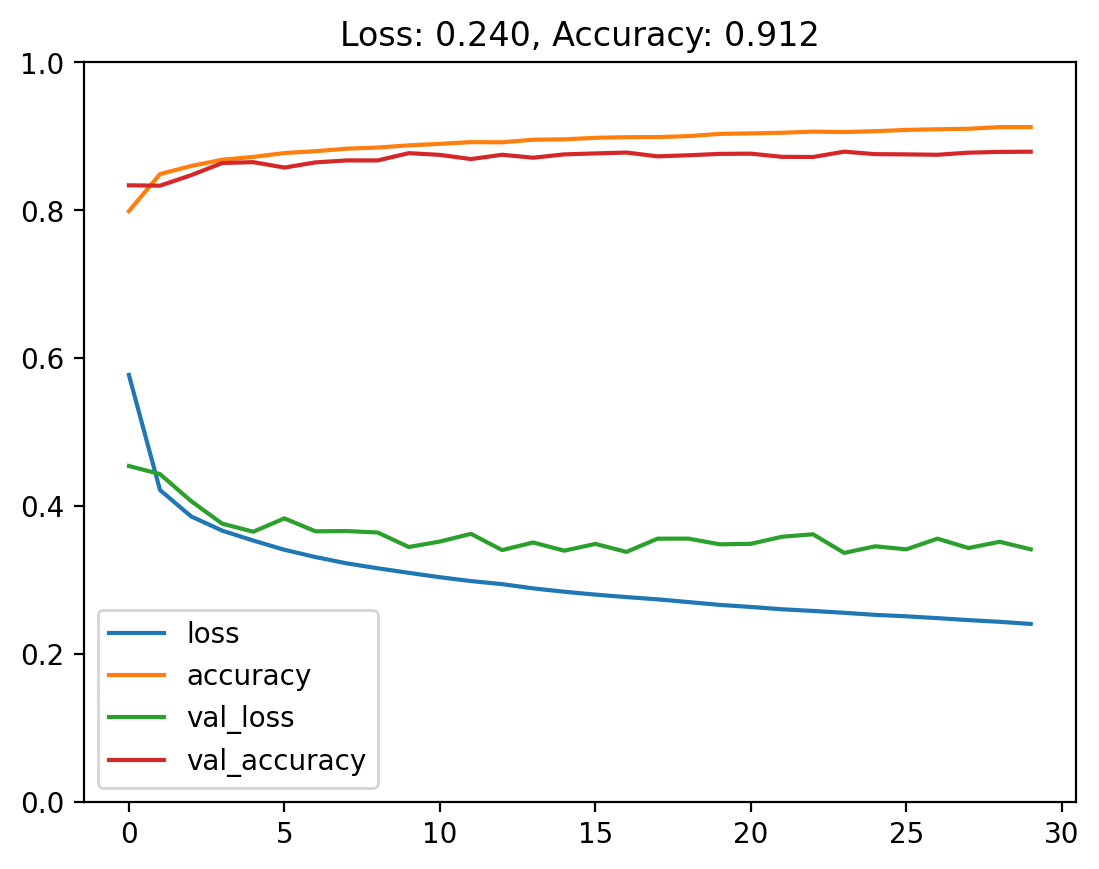

In [ ]:
# Trial 5

# Parameters
units_5 = 32 
activation_funct_5 = 'sigmoid' 
learning_rate_5 = 0.01
num_epochs_5 = 30 
optimizer_name_5  = opt_dict['sgd'](lr=learning_rate_5) 
batch_size_5 = 1 

# Build model function
def build_model_trial5():
  model = Sequential()
  model.add(Dense(units=units_5, activation=activation_funct_5, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_5 = build_model_trial5()
model_5.summary()
model_5.compile(optimizer=optimizer_name_5, loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(x_train, y_train, batch_size=batch_size_5, epochs=num_epochs_5, verbose=verbose_bool, validation_split=.1)
loss_5, accuracy_5  = model_5.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_5)
print(f'Test loss: {loss_5:.3}')
print(f'Test accuracy: {accuracy_5:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1

<Figure size 800x600 with 0 Axes>

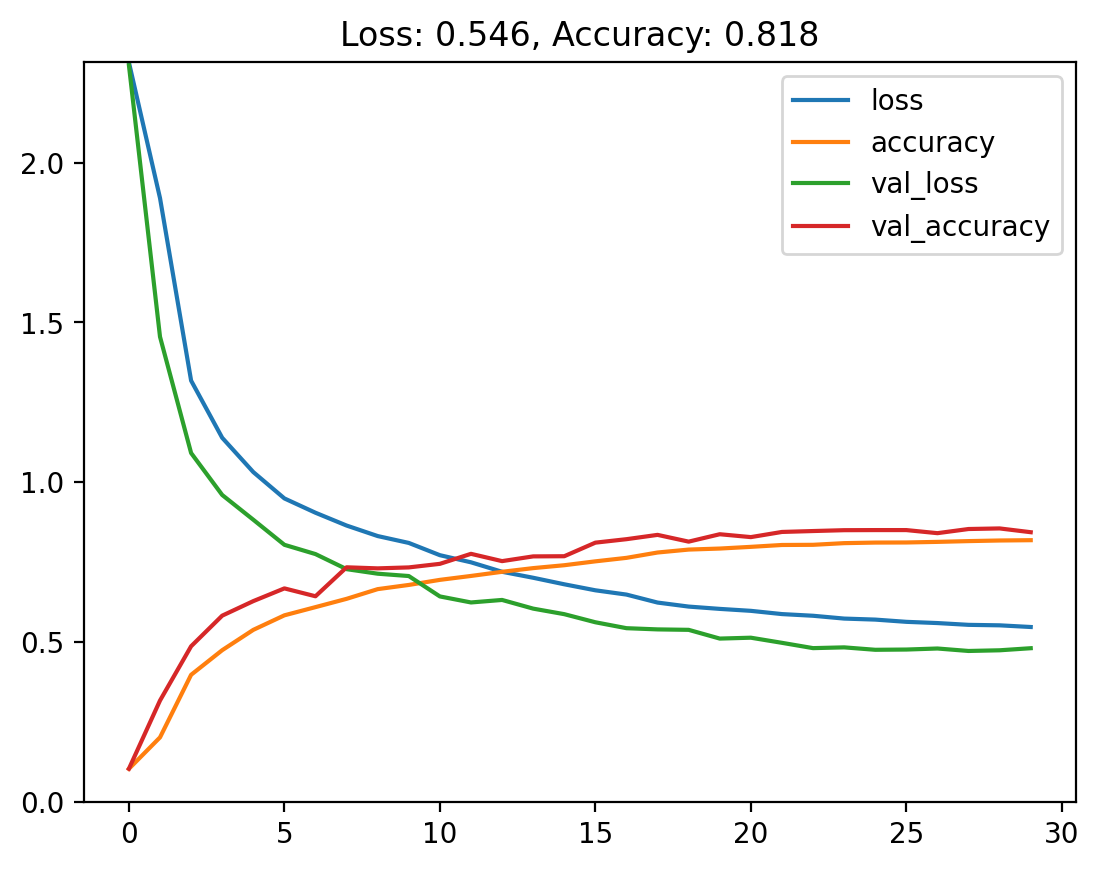

In [6]:
# Trial 6

# Parameters
units_6 = 32
activation_funct_6 = 'sigmoid' 
learning_rate_6 = 0.01
num_epochs_6 = 30
optimizer_name_6  = opt_dict['sgd'](lr=learning_rate_6) 
batch_size_6 = 1 

# Build model function
def build_model_trial6():
  model = Sequential()
  model.add(Dense(units=units_6, activation=activation_funct_6, input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=units_6, activation=activation_funct_6, input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=units_6, activation=activation_funct_6, input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=units_6, activation=activation_funct_6, input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=units_6, activation=activation_funct_6, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_6 = build_model_trial6()
model_6.summary()
model_6.compile(optimizer=optimizer_name_6, loss='categorical_crossentropy', metrics=['accuracy'])
history_6 = model_6.fit(x_train, y_train, batch_size=batch_size_6, epochs=num_epochs_6, verbose=verbose_bool, validation_split=.1)
loss_6, accuracy_6  = model_6.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_6)
print(f'Test loss: {loss_6:.3}')
print(f'Test accuracy: {accuracy_6:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 7

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.372
Test accuracy: 0.879
Computation time: 41 mins


<Figure size 800x600 with 0 Axes>

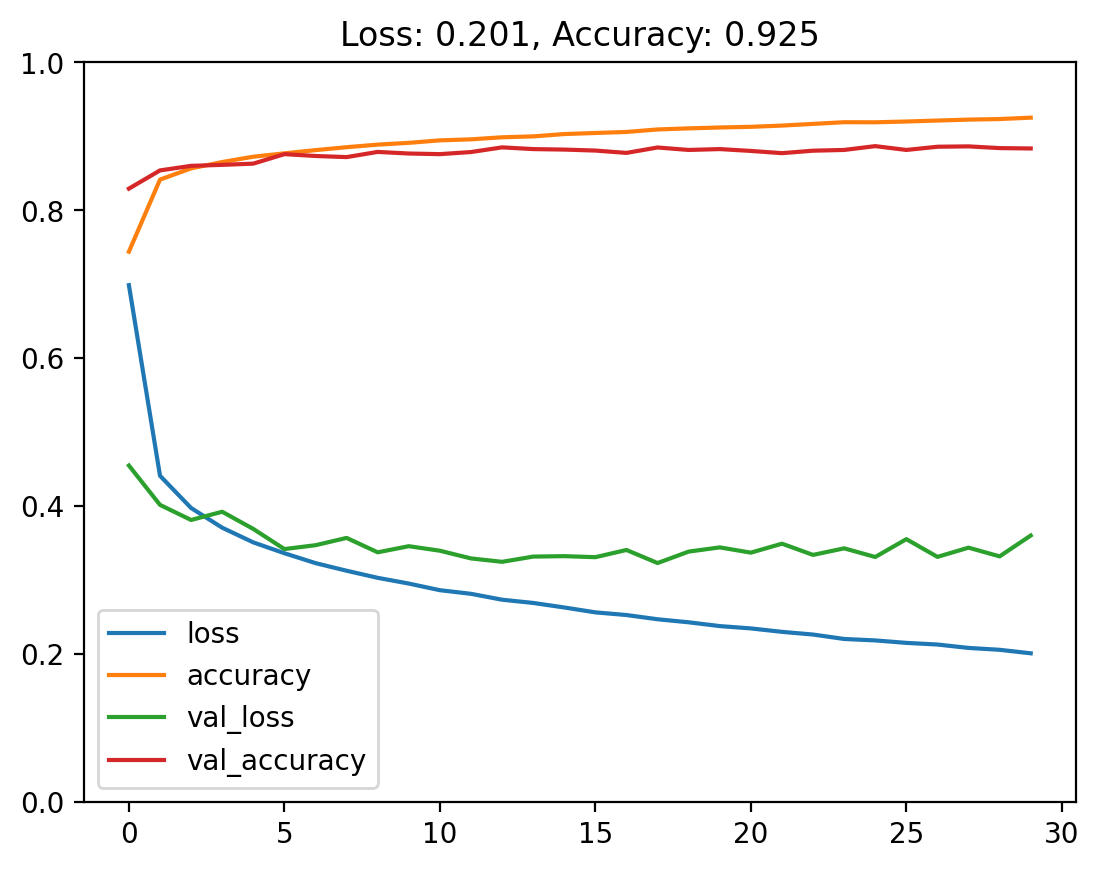

In [11]:
# Trial 7

# Parameters
units_7 = 64
activation_funct_7 = 'sigmoid' 
learning_rate_7 = 0.01 
num_epochs_7 = 30 
optimizer_name_7  = opt_dict['sgd'](lr=learning_rate_7)
batch_size_7 = 1 

# Build model function
def build_model_trial7():
  model = Sequential()
  model.add(Dense(units=units_7, activation=activation_funct_7, input_shape=(image_vector_size,)))
  model.add(Dense(units=units_7, activation=activation_funct_7, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_7 = build_model_trial7()
model_7.summary()
model_7.compile(optimizer=optimizer_name_7, loss='categorical_crossentropy', metrics=['accuracy'])
history_7 = model_7.fit(x_train, y_train, batch_size=batch_size_7, epochs=num_epochs_7, verbose=verbose_bool, validation_split=.1)
loss_7, accuracy_7  = model_7.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_7)
print(f'Test loss: {loss_7:.3}')
print(f'Test accuracy: {accuracy_7:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 8

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.37
Test accuracy: 0.879
Computation time: 46 mins


<Figure size 800x600 with 0 Axes>

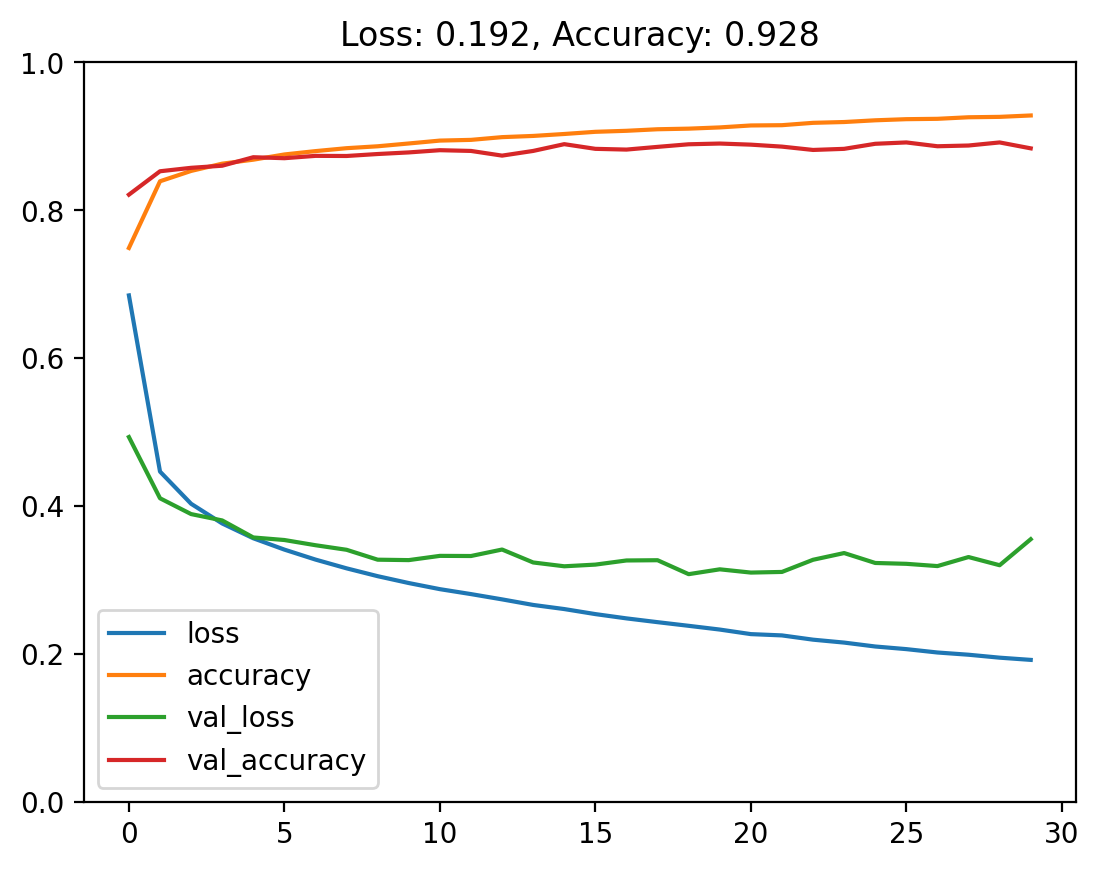

In [12]:
# Trial 8

# Parameters
units_8 = 128 
activation_funct_8 = 'sigmoid' 
learning_rate_8 = 0.01
num_epochs_8 = 30 
optimizer_name_8  = opt_dict['sgd'](lr=learning_rate_8) 
batch_size_8 = 1 

# Build model function
def build_model_trial8():
  model = Sequential()
  model.add(Dense(units=units_8, activation=activation_funct_8, input_shape=(image_vector_size,)))
  model.add(Dense(units=units_8, activation=activation_funct_8, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_8 = build_model_trial8()
model_8.summary()
model_8.compile(optimizer=optimizer_name_8, loss='categorical_crossentropy', metrics=['accuracy'])
history_8 = model_8.fit(x_train, y_train, batch_size=batch_size_8, epochs=num_epochs_8, verbose=verbose_bool, validation_split=.1)
loss_8, accuracy_8  = model_8.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_8)
print(f'Test loss: {loss_8:.3}')
print(f'Test accuracy: {accuracy_8:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 9

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.386
Test accuracy: 0.87
Computation time: 20 mins


<Figure size 800x600 with 0 Axes>

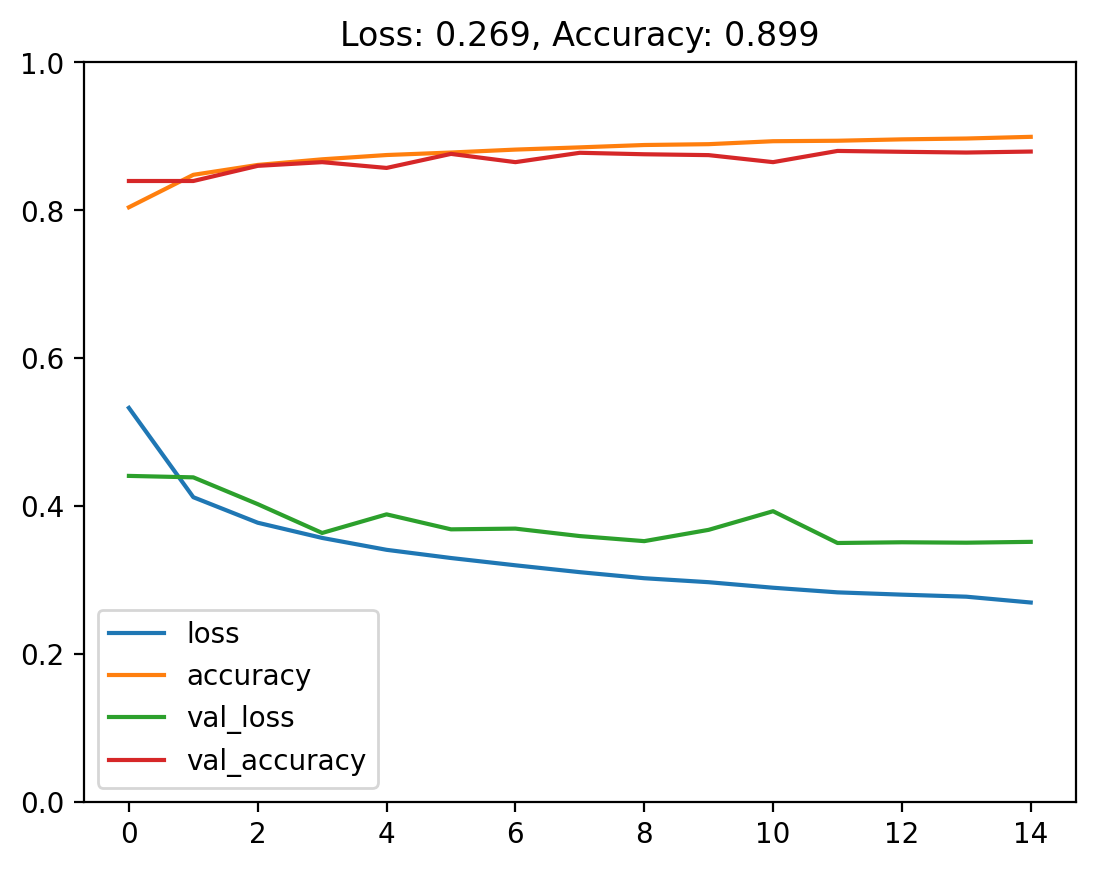

In [13]:
# Trial 9

# Parameters
units_9 = 64 
activation_funct_9 = 'relu'
num_epochs_9 = 15 
learning_rate_9 = 0.01
optimizer_name_9  = opt_dict['sgd'](lr=learning_rate_9) 
batch_size_9 = 1 

# Build model function
def build_model_trial9():
  model = Sequential()
  model.add(Dense(units=units_9, activation=activation_funct_9, input_shape=(image_vector_size,)))
  model.add(Dense(units=units_9, activation=activation_funct_9, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_9 = build_model_trial9()
model_9.summary()
model_9.compile(optimizer=optimizer_name_9, loss='categorical_crossentropy', metrics=['accuracy'])
history_9 = model_9.fit(x_train, y_train, batch_size=batch_size_9, epochs=num_epochs_9, verbose=verbose_bool, validation_split=.1)
loss_9, accuracy_9  = model_9.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_9)
print(f'Test loss: {loss_9:.3}')
print(f'Test accuracy: {accuracy_9:.3}')
print(f'Computation time: {end_time:.0f} mins')

## Trial 10

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.452
Test accuracy: 0.868
Computation time: 50 mins


<Figure size 800x600 with 0 Axes>

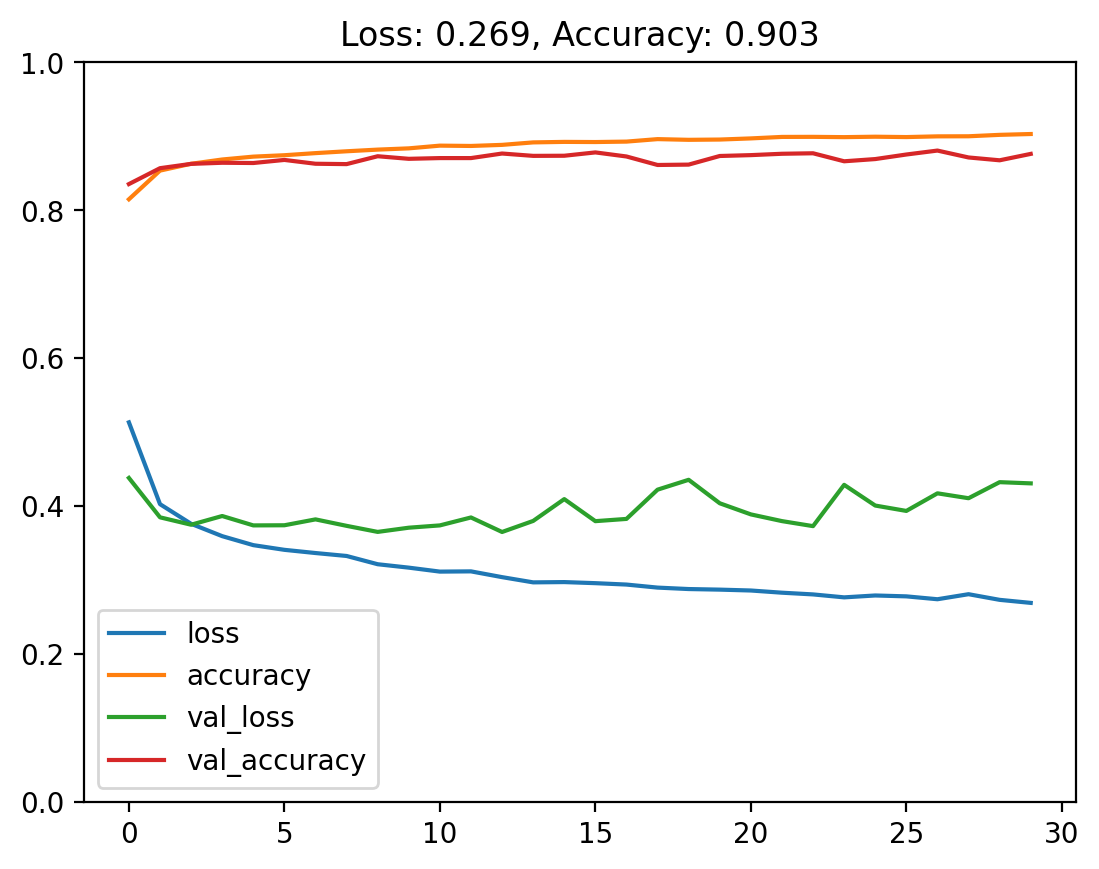

In [14]:
# Trial 10

# Parameters
units_10 = 64 
activation_funct_10 = 'sigmoid' 
learning_rate_10 = 0.01
num_epochs_10 = 30
optimizer_name_10  = 'adam'
batch_size_10 = 1

# Build model function
def build_model_trial10():
  model = Sequential()
  model.add(Dense(units=units_10, activation=activation_funct_10, input_shape=(image_vector_size,)))
  model.add(Dense(units=units_10, activation=activation_funct_10, input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

# Model
start = time.time()
model_10 = build_model_trial10()
model_10.summary()
model_10.compile(optimizer=optimizer_name_10, loss='categorical_crossentropy', metrics=['accuracy'])
history_10 = model_10.fit(x_train, y_train, batch_size=batch_size_10, epochs=num_epochs_10, verbose=verbose_bool, validation_split=.1)
loss_10, accuracy_10  = model_10.evaluate(x_test, y_test, verbose=verbose_bool)
end_time = (time.time() - start)/60

# Performance
plot_loss_accuracy(history_10)
print(f'Test loss: {loss_10:.3}')
print(f'Test accuracy: {accuracy_10:.3}')
print(f'Computation time: {end_time:.0f} mins')